## Irregularities in recent (2018-2019) Hungarian election data

### Supported by 2014 and 2010 general election data

_"People, Not Technology, Weakest Security Link"_

_(Kevin Mitnick)_

#### Working Draft Version 0.3.8

#### János Brezniczky
#### Last content update: 20/09/2019



### Disclaimer

The author is not a statistician, considers himself an enthusiastic hobbyist with some degree of familiarity with data analytics. The author went intentionally "inventive", once fraud metrics are defined, measures can be taken to avoid those - so likely these have to be reinvented regularly in order to remain effective in this continuous chase.

Apparently, some trend has clearly emerged, and since it was caught where other, presumably independent potential traces of result tampering were detected, this is very possibly related to fraud, albeit statistical conclusions will probably never be 100% certain, and no person should be individually judged (possibly misjudged) on the grounds of the below.

Also note, there will probably always be some degree of uncertainity when trying to verify election results a posteriori, so the degree of doubt left after this analysis might as well be minimal.
At the end, the author's personal opinion is also voiced.

### Abstract

Human craft work tends to leave a trace of unevenness on impacted numeric data, for instance, humans are an imperfect source of random numbers. Certain values tend to be avoided or preferred, those of last digits are no exception. Such behaviour can be analytically examined.

The final artifacts are: 

1. A list: ["Overall top 45 suspicious municipalities for the last 2 considered elections"](#overall_top_45_for_last_2), the top list in decreasing order of unlikeliness of the digit statistics. It leverages results, mainly focusing on the results of the winning party from recent years, from the below steps.
2. [Fingerprint plots](#fraud), justifying the previously constructed list in that by splitting the municipality ranking around 50%, we get increasingly and very different plots when comparing the more and less suspect muncipalities' results as we progress from 2014 towards 2019. A theory is also outlined about how this can mean fraud.

[An entropy based overall assessment](#2019_entropy_based_stats) of the 2019 European Parlamentiary Election results alone shows a 97%-98% unlikeliness after focusing on the top 20 municipalities which were identified as the most likely "oddball" candidates through certain heuristics.
The verification is not entirely restricted to these, but a Monte-Carlo simulation covering each ward takes place replacing each vote count last digit with a uniform random value. The extremities obtained via identical steps leading to the aforementioned top 20 candidates are rarely found to be (less than 2%) as extreme as in case of the actual data.
(Without focusing on the top 20, the likeliness increases to some sub-6% value, this is not detailed below.)

Individual municipality results can also be highlighted using entropy likeliness, for instance by [compiling a list from the 2018 and 2019 last digit distribution entropy probabilities](#entropy_2018_2019_summary) and leveraging that the last digits should independently vary in such characteristically different electoral municipalities (the turnout has been 70.22% in 2018 at 7 pm [[1](#ref_1)], whilst only 43.48% at the same time in 2019 [[2](#ref_2)], when the ballots closed). Certain larger municipalities appear to have been treated less accurately than others.

[An additional inclusion of 2014 results](#ent_2014_18_19_top) further broadens the scope, 44 areas are listed with a 5% probability left for them being the result of pure chance, assuming that no anomaly occurred in either of the three years.

[Equality of successive digits](#digit_repeats) can also be considered an anomaly, there are municipalities with an odd prevalence of  this respect as well.

Another approach reliant on [the concept of _overhearing_](#overhearing) (possibly introduced here, but more likely just unknowingly renamed and reintroduced) of values between recorded streams of 2019 digits also concludes a << 5% likeliness of the major value sequences (votes of Fidesz and valid votes) having a uniformly and _independently_  distributed last digit from other sequences.

Whilst it is not entirely accurate to assume a uniform dustrubution of last digits to be the data generating process, even for values (vote counts) greater than 100 - which the regularity probability estimations are based on - apparently this approach seems to be robust in that the ordering still ranks values of various magnitude in the top. [**TODO check on this**]

A number of ways in which [further examinations](#further_results) could be carried out will also be outlined.

The related [methodology](#methodology) is also briefly described (possibly incomplete and/or redundant).

Such examinations are not suited to prove forgery as a fact, natural human mistakes may leave such marks on numeric data as well, and we could similarly expect some degree of random discrepancy, yet any of these underlines at the very least that some quality improvement is likely desirable, especially in certain municipalities.

<a id="2019_entropy_based_stats"></a>
### The 2019 data in entropy based statistics

A brief summary of the findings (about the likeliness of the "top 20" total last digit Fidesz votes entropy wandering this far from their typical values) where the Fidesz party has received at least 100 votes in each ward is as on the below chart.

The histogram depicting the simulations' results does not seem to suggest that this is realistically a clean (distribution wise uniform) situation. The entropy drops fairly low, corresponding with a less than 2% probability in all examined cases, and particularly < 2% for the top 20 candidates. This may however be down to a handful of municipalities with highly obscure results.

The relevant data/code can be found taking a look at the app5_... files.

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6.9, 3]

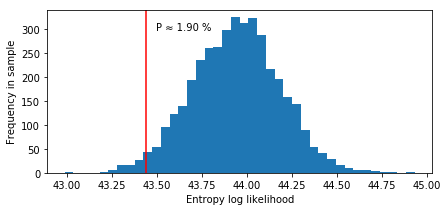

In [13]:
from HU.app5_ent_in_top import plot_app5_entropy_distribution

plot_app5_entropy_distribution()

It is also possible to utilize later results of the project and describe the log likelihood distribution based likeliness of the top 20 actual values assuming that the last Fidesz party vote count digits are uniformly distributed in case of sufficiently sizable municipality as the null hypothesis.
This is expected to be a more accurate probability due to sorting and comparability issues in case of the earlier entropy values (due to the varying municipality ward counts) whilst here the individual municipality p-values better conform with each other.

A p-value of 1.35% allows to reject it with a 5% significance level:

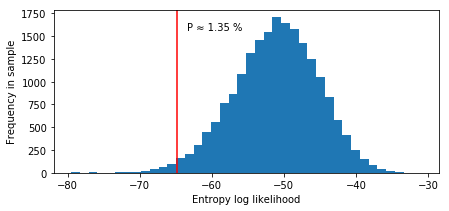

In [14]:
import HU.app9_overall_log_likelihood as app9

app9.plot_summary()

While this is not necessarily a very stark result - depending on what claims we are trying to make or hypotheses to test - this certainly suggests that there is a reason for suspicion, and it is worth being kept in mind that people normally try to correct the traces of inaccuracies - the valid vote count could be adjusted accordingly, numbers could be made up (think of a lazy, short-sighted or just mentally tired vote counter) with care; but also that the signal can often disappear in the noise, examining a too big area or too big group of parties may be counterproductive when trying to find offending numbers.

<a id="entropy_2018_2019_summary"></a>
### Summarizing the 2018 and 2019 election data

Using more data (without losing focus) tends to allow to obtain a perhaps crisper picture. These elections are so close in time that we can expect correlated irregularities.

A pooled analysis of the empiric last digit distributions of data from the two most recent elections did not identify repeat problems with a 95% confidence, however, the suspects can be listed out in increasing likeliness. Also, from the probabilities we may estimate that 14 (since $\sum p_i \approx 14.4$..) of the below 20 could suffer from discrepancies in conveying the true numbers, or slightly less (due to discrepancies expected to coincide).

#### Top suspects for irregularities in both years

Based on vote count last digit entropy values, the most incorrect-looking municipalities, with their respective mutual incorrectness probability for 2018 and 2019 (%), their correctness probability consistently and individually for both years, then only 2019 and 2018 are:

In [15]:
import HU.app6_comparative as app6

(df_comparative, suspects, 
 df_comparative_sorted_by_both, suspects2, 
 df_comparative_sorted_by_all_3, suspects3) = app6.load_results()

suspects2["p_both_incorr_%"] = suspects2["p_both_incorr"] * 100

suspects2[["Settlement", "p_both_incorr_%", "p_2019", "p_2018"]].rename(columns={"Settlement": "Municipality"})


,Municipality,p_both_incorr_%,p_2019,p_2018
0,Tata,94.896465,0.0429,0.0085
1,Balatonfüred,93.350995,0.0395,0.0281
2,Fót,90.833224,0.0101,0.0824
3,Eger,83.660361,0.0453,0.1237
4,Budapest XVI. kerület,74.931360,0.0772,0.1880
5,Mezőtúr,74.402596,0.1998,0.0702
6,Veresegyház,73.818450,0.1998,0.0775
7,Berettyóújfalu,72.978528,0.2664,0.0052
8,Vecsés,69.412224,0.0004,0.3056
9,Dunaföldvár,67.401178,0.3006,0.0363


#### Top suspects for some irregularity in at least one of the 2018 and 2019 (EP) elections

On the other hand, naturally, the number of cases where at least one of the results looks suspicious (i.e. it is significantly unlikely, < 5%, that both would be 'regular'), is greater than that of the cases where only the 2019 results appeared odd (not detailed here), and yields a crisper view, once 2018 values had been taken into account.

Note that the limiting p-value below is 0.1 i.e. the list is cut off at 10%.

In [16]:
suspects["p_both_correct_%"] = suspects["p_all_2"] * 100
suspects[["Settlement", "p_both_correct_%"]].rename(columns={"Settlement": "Municipality"})

,Municipality,p_both_correct_%
0,Vecsés,0.012224
1,Tata,0.036465
2,Fót,0.083224
3,Balatonfüred,0.110995
4,Berettyóújfalu,0.138528
5,Pécel,0.189800
6,Eger,0.560361
7,Budapest XV. kerület,0.817894
8,Mezőkövesd,0.943138
9,Dunaföldvár,1.091178


<a id="ent_2014_18_19_top"></a>
#### Top suspects for some irregularity in at least one of the 2014 general, 2018 general and 2019 (EP) elections

Involving one more year's generic eletion data plausibly further increases the number of suspect locations.

Below the probability for instance next to Eger (second column) means that there is a 0.55% chance (~ 1:180) that the values are regular in all three cases, i.e. nothing unusual took place that would have otherwise affected the uniform distribution of the last digits.

In [17]:
suspects3["p_all_3_%"] = suspects3["p_all_3"] * 100 
suspects3[["Settlement", "p_all_3_%", "p_2014", "p_2018", "p_2019"]].loc[
    suspects3["p_all_3_%"] <= 5].rename(
    columns={"Settlement": "Municipality"})

,Municipality,p_all_3_%,p_2014,p_2018,p_2019
0,Vecsés,0.010412,0.8518,0.3056,0.0004
1,Tata,0.014145,0.3879,0.0085,0.0429
2,Berettyóújfalu,0.036904,0.2664,0.0052,0.2664
3,Püspökladány,0.043300,0.0008,0.7237,0.7479
4,Balatonfüred,0.053966,0.4862,0.0281,0.0395
5,Fót,0.054121,0.6503,0.0824,0.0101
6,Mezőkövesd,0.061870,0.0656,0.0101,0.9338
7,Veresegyház,0.065345,0.0422,0.0775,0.1998
8,Pécel,0.173553,0.9144,0.3650,0.0052
9,Kerepes,0.205890,0.0281,0.4862,0.1507


Is there really a bit of room for suspicion? Looking into e.g. the Balatonfüred data just slightly deeper - particularly the 2019 EP result for 4 (ex-?)major parties (Fidesz, Jobbik, DK, Momentum) reveals that the numbers do not seem to get any less irregular - just by the eye it is easy to spot that 4 never appears.

A quick plot consistently appears to show an odd distribution.

The corresponding p-value is 1.61% - note that it is a remarkable drop from the original 2019 probability, 3.95%.

p = 1.61 %


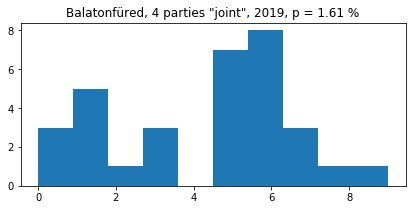

In [18]:
from HU.preprocessing import get_preprocessed_data
import matplotlib.pyplot as plt
import numpy as np
from drdigit.digit_entropy_distribution import get_entropy, prob_of_entr

df_2019 = get_preprocessed_data()
df_2019[df_2019.Telepules=="Balatonfüred"][["Fidesz", "Jobbik", "DK", "Momentum"]]

digits_Balatonfured = np.concatenate(df_2019[df_2019.Telepules=="Balatonfüred"]
                                     [["Fidesz", "Jobbik", "DK", "Momentum"]].values % 10)

plt.hist(digits_Balatonfured, bins=10)

p_Balatonfured = prob_of_entr(len(digits_Balatonfured), get_entropy(digits_Balatonfured))

print("p = %.2f %%" % (p_Balatonfured * 100))

plt.title("Balatonfüred, 4 parties \"joint\", 2019, p = %.2f %%" % (p_Balatonfured * 100))

plt.show()

### The 2014 data: Fidesz, Fidesz and Jobbik

The 2014 data yields a handful of candidates when only looking at the Fidesz vote counts alone.

#### Top 2014 candidates for irregularity in the number of Fidesz votes

In [19]:
import HU.app6_comparative as app6


df_comparative, _, _, _, _, _ = app6.load_results()
df_comparative.reset_index(inplace=True)
df_comparative[["Settlement", "p_2014"]][(df_comparative.p_2014 < 0.05) &
                                         (df_comparative.count_2014 >= 8) &
                                         (df_comparative.min_votes_2014 >= 100)] \
              .sort_values(["p_2014"]).rename(columns={"Settlement": "Municipality"})

,Municipality,p_2014
502,Püspökladány,0.0008
63,Derecske,0.0027
90,Kerepes,0.0281
91,Kisújszállás,0.0281
223,Érd,0.0301
83,Budapest II. kerület,0.0317
550,Budapest XI. kerület,0.0333
407,Budapest IX. kerület,0.0411
30,Veresegyház,0.0422


The entropy based verification should be more reliable over more sizable areas. There are 3 of the districts of the capital listed above. It is at least an interesting coincidence (?) that according to [[3](#ref_3)] two of those, namely the Budapest XI. and IX. districts (kerület) have seen Fidesz conquering an extraordinarily faint victory in that year (~2..5% ahead of the second candidate).

#### The top 2014 candidates based on common irregularities in the number of votes of Fidesz and Jobbik

Should the values be affected by some 'anomaly', assuming it is a consistent anomaly - a common habit, or "hand" - this should leave, albeit stochastic, consistent marks on the data.

Since both the Fidesz and Jobbik parties frequently received numerous votes on this occasion, the Jobbik party vote last digits should also lend themselves for uniformity checks in several cases. (In case of small values, say in the range of 1..10, a downward bias is expected, as large values become less likely and this is reflected in the last digit - since that is the only digit. But as the values increase, this effect is expected to fade out.)
Here a little relaxation of the number of votes constraint was applied, the minimum for Jobbik votes was 50 instead of 100 - the norm above.

In [20]:
import HU.app7_fidesz_vs_jobbik as app7


_, suspects = app7.load_results()
suspects


,Telepules,min_votes,Korzet_count,entropy,p
0,Budaörs,52,40,2.095817,0.0834
1,Bátonyterenye,57,30,1.985231,0.0448
2,Edelény,120,16,1.771016,0.0868
3,Kerepes,100,16,1.721402,0.0541
4,Pomáz,54,32,1.956679,0.0141
5,Pásztó,54,18,1.798106,0.0639
6,Püspökladány,118,32,1.879748,0.0020
7,Szeged,50,218,2.264374,0.0586
8,Szigethalom,82,32,2.018515,0.0560


This comparison of the distribution of the then leading two parties, Fidesz and Jobbik, suggests that the Szeged (one of the larger cities in Hungary, representing about 1.6% of the population) area could have really deserved some close attention - whether or not certain suspect efforts (if any) have reached their goal.

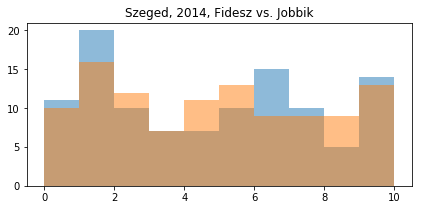

In [21]:
import HU.AndrasKalman.load

HU.AndrasKalman.load.plot_location("Szeged")

<a id="digit_repeats"></a>
### Irregularity in consecutively repeating last digits in the data sets

Another way of finding traces of human bias (whether it is unintentional) among the digits is to find how often the last digits of consecutive numbers match and employ some statistic on this frequency. Such repetitions apparently take place with a surprising frequency in some cases.

Albeit [[8]](#ref_8) mentions that digit repetition tends to be avoided ("Without  exception,subjects avoided repetition in their sequences, rarely creating repetitive pairs or triplets") we can also suspect that known fraudulent behaviours will be likely avoided by subjects, thus this is examined as below.

However it would be also reasonable to test for the deviation towards avoiding the repetitions as well (this could take place in the future).

#### The top candidates (at most 10% likeliness of regularity) for 2019

In [22]:
import HU.app8_prob_of_twin_digits as app8

app8_df, app8_suspects = app8.load_results()

app8_df[["Telepules", "p_ld_Fidesz_twins_2019"]].loc[
    (app8_df["p_ld_Fidesz_twins_2019"] < 0.1) &
    (app8_df["n_wards_2019"] >= 8) &
    (app8_df["min_Fidesz_votes_2019"] >= 100)
].sort_values([
    "p_ld_Fidesz_twins_2019"
]).reset_index().drop(columns=["index"])

,Telepules,p_ld_Fidesz_twins_2019
0,Eger,0.000422
1,Maglód,0.002728
2,Tapolca,0.044133
3,Gyömrő,0.055556
4,Veresegyház,0.055556
5,Debrecen,0.085127


#### The 2018 candidates

Interestingly, the 2018 candidates are more numerous:

In [23]:
app8_df[["Telepules", "p_ld_Fidesz_twins_2018"]].loc[
    (app8_df["p_ld_Fidesz_twins_2018"] < 0.1) &
    (app8_df["n_wards_2018"] >= 8) &
    (app8_df["min_Fidesz_votes_2018"] >= 100)
].sort_values([
    "p_ld_Fidesz_twins_2018"
]).reset_index().drop(columns=["index"])

,Telepules,p_ld_Fidesz_twins_2018
0,Berettyóújfalu,0.012720
1,Százhalombatta,0.012720
2,Dabas,0.012720
3,Baja,0.030563
4,Hajdúsámson,0.038092
5,Budapest V. kerület,0.043174
6,Budapest XXII. kerület,0.062828
7,Budapest XVI. kerület,0.066589
8,Komárom,0.068406
9,Budapest XXI. kerület,0.080480


The top suspects which are unlikely (at most 5% likely) to be regular in each of 2019, 2018 and 2014 in this respect are listed below.

In [24]:
app8_suspects[["Telepules", "p_all_regular"]]

,Telepules,p_all_regular
0,Eger,0.000177
1,Berettyóújfalu,0.000561
2,Maglód,0.001423
3,Gyömrő,0.001882
4,Százhalombatta,0.004555
5,Komárom,0.005473
6,Budapest XVI. kerület,0.007467
7,Püspökladány,0.008120
8,Dabas,0.010101
9,Balatonfüred,0.011691


<a id="overhearing"></a>
# Overhearing

Imagine for a second that not everything goes picture perfect.
Anne is about to write down a digit, and Beatrix is dictating a counting result to Carl. Wouldn't it be likely for Anne to get confused, and write down - even just out of an inattentive moment - the wrong one?
Or when looking at a form, it can be tempting to enter a digit recently written - once again.
Of course, in a difficult to distinguish fraudulent setup, it could also serve as the kiss of the muse when trying to fill up the less relevant last digit holes in the digit sequence.
Anyhow, the series of digits would more frequently than expected, coincide.

The app14 file is operating along these lines.

The results suggest that some degree of overhearing can very easily be present in the data (for sufficiently large municipalities) in case of the valid votes ("Ervenyes") column/those of the Fidesz party vs. other major parties.

It seemed particularly difficult to find a simple way to look for small effects that may affect data in a dispersed form, partly because apart from the numbers of Fidesz, and the valid votes, most recent values relating to the elections were not hitting a "$\ge 100$" mark too often, and anomalies were generally expected to be heterogeneous.

However, this aspect seems to be of the more feasible ones. The result is shown on the below chart.

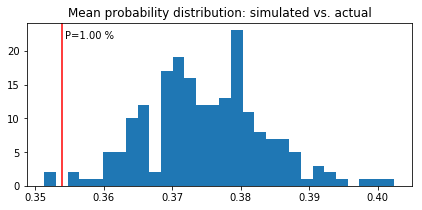

In [25]:
import HU.app14_digit_correlations_Hun as app14

app14.plot_equality_tests()

What we find is that this takes place with a $\lt$ 1% (approximately 0.5%) likeliness, meaning that we can reject the null hypothesis of the data being accurately recorded in this respect with a 95%+ confidence.


### Overhearing top 10

We can construct a top list based on the ratio of the likeliness of hits vs. the expected likeliness given our simulations. The top 10 least likely municipalities are listed below.

In [26]:
_, top_list = app14.get_top_list(n_top=10)

top_list["rel_mean_prob_%"] = 100 * top_list["rel_mean_prob"]
top_list[["Telepules", "rel_mean_prob_%"]]

,Telepules,rel_mean_prob_%
1,Érd,58.031912
2,Békéscsaba,59.880470
3,Budapest XIV. kerület,65.459814
4,Budapest XX. kerület,68.350809
5,Kaposvár,70.940891
6,Budapest XIX. kerület,71.862407
7,Püspökladány,72.224912
8,Pomáz,72.235553
9,Kiskunhalas,73.698753
10,Szolnok,74.471418


Note that these probabilities are the geometric mean likeliness of each examined "base" column (Fidesz, valid votes) vs. major party (DK, Momentum, Jobbik, MSZP, LMP) pairs, and thus the actual likeliness of no unusual relationship is far lower, being the product of a number of values centered around this one on a logarithmic scale, relative to a (simulated) base probability calculated per each municipality. These products are to be subject to further examination and are only used for ranking at this point.)

Why the "base" columns were considered suitable is more detailed in the Appendix.

# Overall top 45

An overall list can be compiled using a cumulative score (here it was chosen to be the product of the various probabilities) in ascending likeliness (decreasing unlikeliness).

There are 183 sufficiently sizeable municipalities, about 25% of those, the first 45 were listed out.

### Overall top 45 for the last 3 considered elections

In [27]:
import HU.app15_overall_ranking as app15

df = app15.get_overall_list_all_3_years()

print(df.head(45)[["Telepules", "p"]])

                  Telepules             p
0            Berettyóújfalu  2.178722e-07
1                      Eger  8.564313e-07
2              Püspökladány  2.539506e-06
3              Balatonfüred  5.881752e-06
4                      Baja  1.555565e-05
5                    Maglód  1.980701e-05
6                     Lenti  2.436989e-05
7               Veresegyház  2.904684e-05
8                   Kerepes  3.363888e-05
9     Budapest XVI. kerület  3.376642e-05
10                   Vecsés  3.570705e-05
11             Kisújszállás  4.509467e-05
12                      Érd  7.001855e-05
13                      Fót  8.170928e-05
14                     Tata  8.650185e-05
15              Nagykanizsa  8.769989e-05
16                   Gyömrő  8.882073e-05
17           Százhalombatta  1.095982e-04
18                  Komárom  1.145256e-04
19                     Ócsa  1.151669e-04
20                    Pécel  1.610064e-04
21  Budapest XXIII. kerület  1.882683e-04
22                Tótkomlós  2.136

<a id='overall_top_45_for_last_2'></a>
### Overall top 45 suspicious municipalities for the last 2 considered elections

It is probably more interesting to focus on more recent events so that enough attention can be paid to prevent the most likely recent mistakes (if any) from recurring.

Fortunately there have been at least a couple of events recently and the third one is just around the bend, hopefully providing a good chance as local pecularities, such as personnel, are less likely to change over shorter periods.

In [28]:
import HU.app15_overall_ranking as app15

df = app15.get_overall_list_last_2_years()
print(df.head(45)[["Telepules", "p"]])

                  Telepules         p
0                      Eger  0.000002
1            Berettyóújfalu  0.000015
2                    Maglód  0.000024
3                    Vecsés  0.000046
4              Balatonfüred  0.000081
5     Budapest XVI. kerület  0.000112
6                       Fót  0.000126
7                      Ócsa  0.000191
8                      Tata  0.000223
9            Százhalombatta  0.000375
10            Bátonyterenye  0.000432
11                    Pécel  0.000582
12                     Baja  0.000607
13                   Gyömrő  0.000667
14              Veresegyház  0.000688
15               Békéscsaba  0.000776
16                 Dombóvár  0.000931
17                    Lenti  0.001063
18              Nagykanizsa  0.001094
19                   Putnok  0.001383
20  Budapest XXIII. kerület  0.001422
21                      Mór  0.001891
22                    Dabas  0.001926
23                  Tapolca  0.002002
24                 Orosháza  0.002143
25          

# The power of the cross-compiled statistic

### Fingerprint charts

The (not deeply checked) literature frequently mentions the use of voting fingerprint images (e.g. see [[9]](#ref_9)).
These allow to examine at a glance how an election could have been affected by irregular activities, such as ballot stuffing, resulting in smears, multimodalities etc.
Only at this late point (after the above concluding list) were such plots created, but with a surprisingly useful result.

The below chart hopefully helps a bit with understanding the impact of some scenarios on the fingerprint charts.

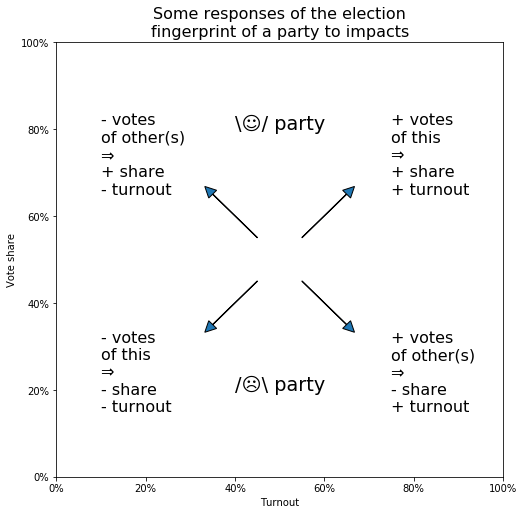

In [29]:
import matplotlib.pyplot as plt
import drdigit as drd

plt.rcParams['figure.figsize'] = [8, 8]

drd.plot_explanatory_fingerprint_responses(fontsize=16)

The next plot is meant to help with understanding how fingerprint plot points respond to impacts.

For instance on the first plot, the lines are "isovote" lines in the sense that they are the points belonging to a certain number of votes received by a party, whilst other parties receive various amounts of votes.

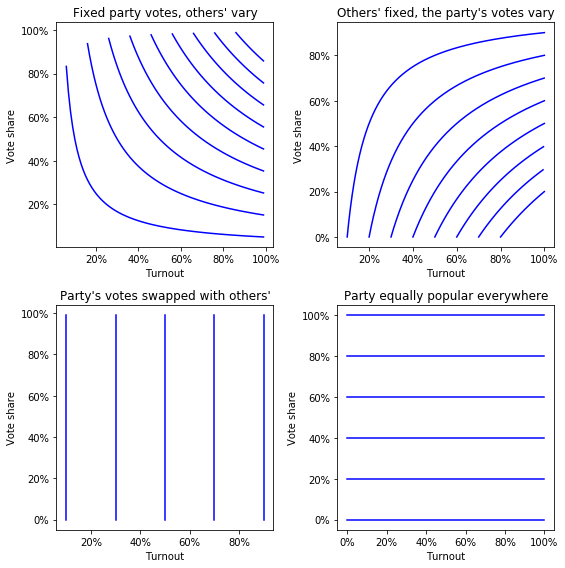

In [30]:
drd.plot_explanatory_fingerprint_dynamics()

<a id="fraud"></a>
### Comparing fingerprints of less and more suspect areas

The fingerprint plots below are slightly modified compared to those described in [9](ref_9) in that they are weighted by the vote counts falling in the given histogram bin, in order to depict the vote mass distribution.

By plotting this fingerprint for the top 90 vs. the rest of the municipalities we have an opportunity to inspect whether the classification (based on last digits only) can unveil any noticeable meddling.

On the below plots, the red patch size is roughly proportionate with the mass of votes gained in the more suspicious areas over the less suspicious, and the blue patch size with the "vice versa" scenario.

From these difference sets, it is possible to estimate what percentage of the total valid votes, i.e. how many percent points of the final performance of the winning party, are represented by the difference between the municipalities with less and more regular vote records.

In [1]:
import matplotlib.pyplot as plt

from HU.app16_fingerprint_plots import (
    plot_2010_fingerprints, plot_2014_fingerprints, 
    plot_2018_fingerprints,  plot_2019_fingerprints,
    PARTIES_2010, PARTIES_2014, PARTIES_2018, PARTIES_2019
)

plt.rcParams['figure.figsize'] = [5, 3]


### 2010

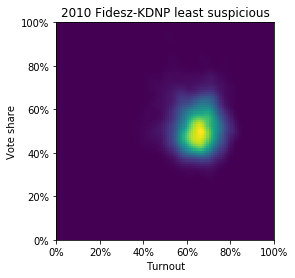

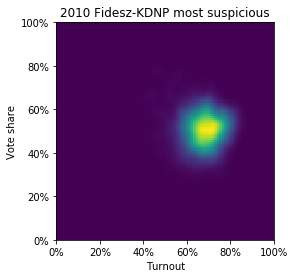

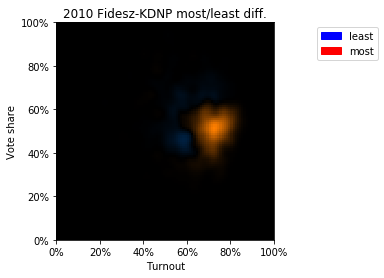

Statistic,Value
Est. percentage points repr. by difference,4.86 %
Extra votes in difference area (1000s),224.3


In [3]:
plot_2010_fingerprints(parties=PARTIES_2010[:1], save=False)

### 2014

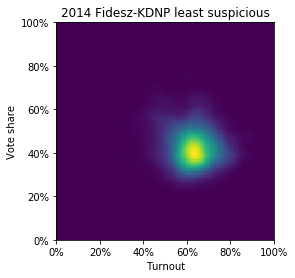

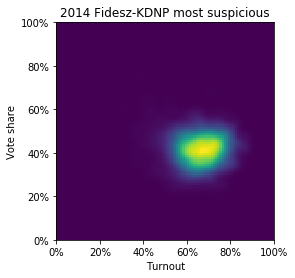

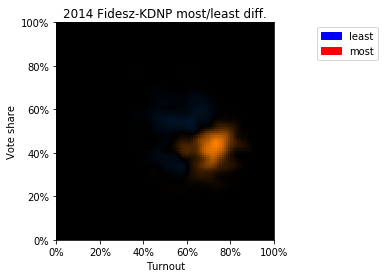

Statistic,Value
Est. percentage points repr. by difference,3.60 %
Extra votes in difference area (1000s),176.6


In [4]:
plot_2014_fingerprints(parties=PARTIES_2014[:1], save=False)

### 2018

(Note the skew.)

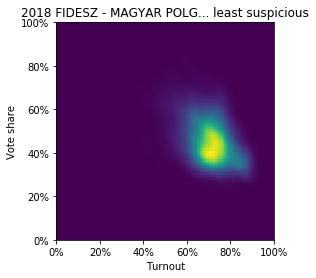

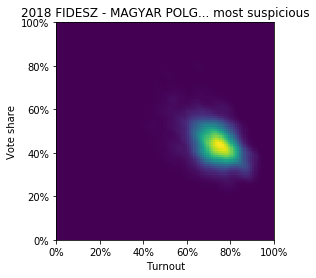

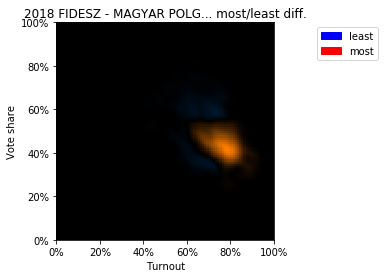

Statistic,Value
Est. percentage points repr. by difference,3.58 %
Extra votes in difference area (1000s),195.8


In [5]:
plot_2018_fingerprints(parties=PARTIES_2018[:1], save=False)

### 2019

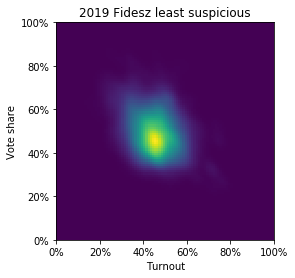

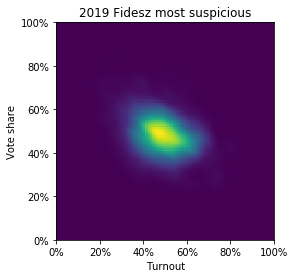

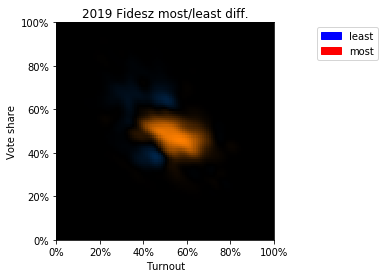

Statistic,Value
Est. percentage points repr. by difference,4.59 %
Extra votes in difference area (1000s),156.0


In [6]:
plot_2019_fingerprints(parties=PARTIES_2019[:1], save=False)

### What we can observe

There is an increasingly varying range of turnout covered by the plots for the more irregular areas.

The potentially more inaccurately recorded municipalities in 2010 and 2014 seem to be smeared towards the high vote share high turnout corner. These look very mild but are akin to a ballot stuffing scenario: the difference between the two plots is briefly above and to the right of the overlapping part of the more suspicious vote cloud, in both cases.

The red, less regular municipalities' votes patch always outweighs the blue one, which is hardly visible and which we should typically be able to find next to the left side of the patches, typically at the bottom.

Note that the digit distribution criteria or the choice of municipalities in no obvious way imply such an a) abruptly appearing skew, as it happens to show up in 2018 and b) its increase by 2019.

The skew could be roughly considered consistent with an increased variation in the total number of votes earned by the opposition parties, referring back to the first of the fingerprint dynamics charts with respect to the direction of the smear.

Also note the 2018 plot seems to be split into patterns where, beyond a bottom left patch, the smeared distribution of top suspect ward votes is additionally, and almost separately retained in the bottom suspects, suggesting that there should be better ways to cluster the wards. If so, these could likely be found e.g. via adjusting the threshold (these adjustments were intentionally avoided so far) or via trying to cluster the vote clouds based on the visually perceived chart distance, subject to future work.

### A possible explanation

#### Summary

The 2010 and 2014 fingerprint pairs suggest a plain vote count manipulation. The 2018 and 2019 plots suggest vote count manipulation including an extra jitter to cover the trails of the manipulation. The manipulation could have taken place at least partly in the areas more difficult to win for Fidesz, judging from the 2010 and 2018 plots, the more suspicious areas largely catch up with, but do not outperform the less suspicious ones.

#### 2010-2014

Both in 2010 and 2014 it seems the fingerprint for the more suspicious areas is made more preferrable by a clear upper right hand corner smear towards high vote high turnout, which is a sign of ballot stuffing. Since the suspicious areas were identified based on last digit coincidences, it is reasonable to assume that this would have taken place on a "virtual" basis, i.e. directly manipulating the final vote counts by human intervention.

The author is surprised that the difference patch covers a magnitude of 200,000 votes, even though these fingerprint charts are and should be treated as approximations.

Motivation for a hypothetical vote rigging could be easily found, for instance the Fidesz party could have been desperately trying to revive its economic backing, among them the unfairly underdocumented Vegyépszer Kft. Whilst few if any were gossiping to the author's knowledge about electoral fraud those years, corruption was a known issue, only that Hungary comes from a background of "go getting", socialist times, where certain things (Hungarian: "hiánycikk") were often difficult to obtain unless from "under the counter" (Hun: "pult alól"), we were past privatisation waves, and thus the perceived degree did not really hurt most people's eyes unusually. According to Wikileaks documents the former prime minister, Viktor Orbán, could have easily been behind an attempted coup as early as in 2006, which in the end is considered by many to at least contribute to the election loss of the Gyurcsány government (beside numerous also significant issues, such as the Financial Crisis of 2007-2008). This does suggest deep ambitions and not shying away from the use of ethically very questionnable methods.


#### From 2014 to 2018: a change in shape

It seems plausible that what we can observe is engineered, systemic manipulation.

As we see on the chart, in 2018, a "south-east" (towards high turnout low vote share) line appears, whilst the turnout seems to increase. This could be on its own disadvantageous for the winning party.
There is, however, a nearly isolated relatively low turnout-low vote share patch on the 2018 less suspicious chart. Since this resembles the 2010 and 2014 less suspicious results the most, this could the unmanipulated fraction of the more regular Fidesz fingerprint.

Then note two things:
1. The line itself on average is a shift towards the high turnout high vote share corner (beneficial for the winning party), compared to the hypothetically unmanipulated patch, i.e. it is advantageous in those areas
2. In 2012, a research paper by Klimek et al. was released. This introduced the concept of electoral fingerprint plots. [**TODO: verify**]  Such a paper may not have an immediate impact on a fraud strategy, but we could plausibly expect an eventual effect.

This paper (_Statistical detection of systematic election irregularities_, [9](ref_9)) describes a characteristic sign of electoral frauds in Russia, as well as Uganda: a smearing towards the top right, high turnout, high vote share corner, in a ballot stuffing scenario: this can for example be the result of adding ballots favouring the winning party.

With respect to the above charts, we may see an improvement - if a rigging method were to result in such clues, those clues could be simply blurred by distributing the fraudulently created votes alongside a line perpendicular to the "+ +", low to high vote, low to high turnout translation of the patch. This may well explain why the appearance changed from 2014 to 2018.

From the technical perspective, to construct such an isolated line someone could
1. add votes of the winning party, to obtain the benefit, displaying as a distance from the original cluster of votes
2. scatter the translated (and originally likely round) cluster perpendicularly by adding/removing a random amount of a portfolio of their own/others votes - then the proportions of the portfolio roughly set out the tangent of the line

Such a portfolio also allows for controlling other parties' results. In fact, from the 2018 chart we could estimate that Fidesz votes were not predominantly included in the package, it is the opposition votes that seem to vary on an unusually large scale. The Momentum party seems to have been the biggest beneficiary of these hypothetical activities (see a few paragraphs away below).



#### 2018-2019: an increased difference in shape

In 2018, the line possibly associated with fraudulent, engineered results seems to be mildly favouring Fidesz.
It may have been the result of a so widely applied method of fraud, that it even impacts the less suspicious half - meaning over 50% of the wards easily being affected. Fidesz conquered an overwhelming victory. This is one possible reason for that... but it may be difficult or impossible to get a good understanding of the situation from the charts at this stage. 

The ranking based on the irregularity of last digits splits the 2019 chart into very different halves.

The further increased skew (almost horizontal) may suggest - in case any systemic fraud were to happen - that the designers simply overestimated the turnout, or just tried to get as much as they could.

More interestingly, the vote control allows for moving votes from one area to another without necessarily changing the overall proportions, so that on the grand scheme they fit within the range formerly predicted by polls, but are more useful for reliably capturing electoral wards. Surplus from easily won areas can be channeled to problematic regions. Examining and demonstrating whether the data fits this theory may take place in the future.

It has to be noted, that if there is a vote count manipulation, it is (based on the above only) cautiously carried out, as the Fidesz vote count did not at first seem to deviate in favour of Fidesz, had we looked at the breakdown of the party vote shares in the difference.

The 2018 results were in the end widely believed to be fraudulent.
I remember many of us standing in front of a projection screen, waiting for the results. All of us there tried to make the government go away with all the mess they were making, including the hate campaigns. Our only question was by how much they would lose. And yet, we were confronted with a consistent, technically 100% effective victory. Everybody was thinking of fraud, and nobody knew how to prove it on the spot. I spent the aftermath trying to find Fidesz voters, I was curious - why did they vote? I managed to find one (1) around next midday in the capital, perhaps 1:10 or 1:20 or less of the people I randomly talked to.

#### A side-effect example: Momentum, 2019

Perhaps the biggest 'side-beneficiary' of the difference seems to be the Momentum party. In defence of Momentum, there is no sign of any effort to cover the trails of this infulence - i.e. this is not necessarily a good willed favour in the hypothetical incident, possibly additional votes would have needed to go somewhere, and Momentum may have looked perhaps the most preferrable opposition party for some reason, or maybe as something to look like the prime suspect for smearing. Momentum was consistently a "winner" of the influencing in 2018, too.

Obviously it is not possible to find out what entity, if any, interfered with the results - it could all even be a matter of very rare coincidence. Just note the likely astronomically low chance.

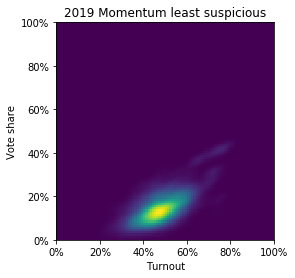

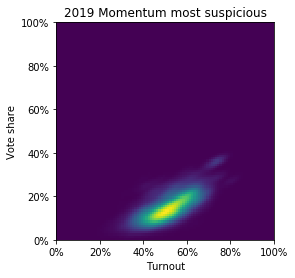

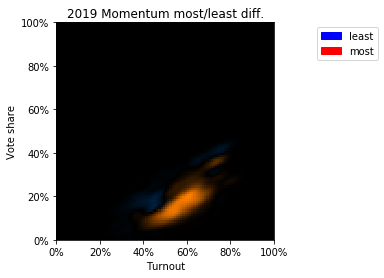

Statistic,Value
Est. percentage points repr. by difference,1.50 %
Extra votes in difference area (1000s),51.1


In [7]:
plot_2019_fingerprints(parties=PARTIES_2019[3:4], save=False)

#### A potential target: Jobbik (2019)

Jobbik was apparently not that much favoured by the extra votes (neither in 2019, nor, although not detailed below, in 2018).

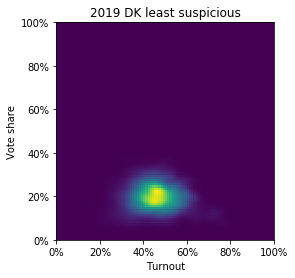

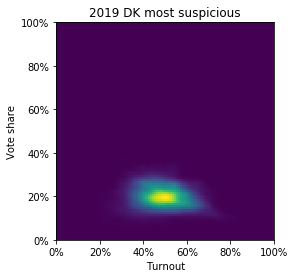

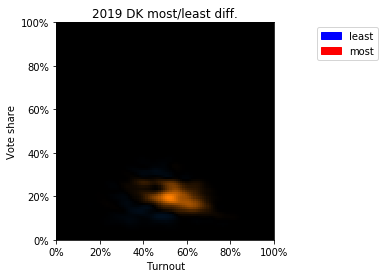

Statistic,Value
Est. percentage points repr. by difference,2.04 %
Extra votes in difference area (1000s),69.3


In [8]:
plot_2019_fingerprints(parties=PARTIES_2019[4:5], save=False)

### Further results<a id="further_results"></a>

The below resulted from trying to examine a weakness in the above - that it is not deeply verified how stable the above are against slight deviations from the assumed uniform distribution. However, the effort at determining the distribution by regressing a line on the histogram (see Appendix) resulted in poor model diagnostics, and during a deeper look the below was found.

#### Other last digits

The below two charts provide an overview of the last digit distributions as well as the vote count distributions per certain last digits.

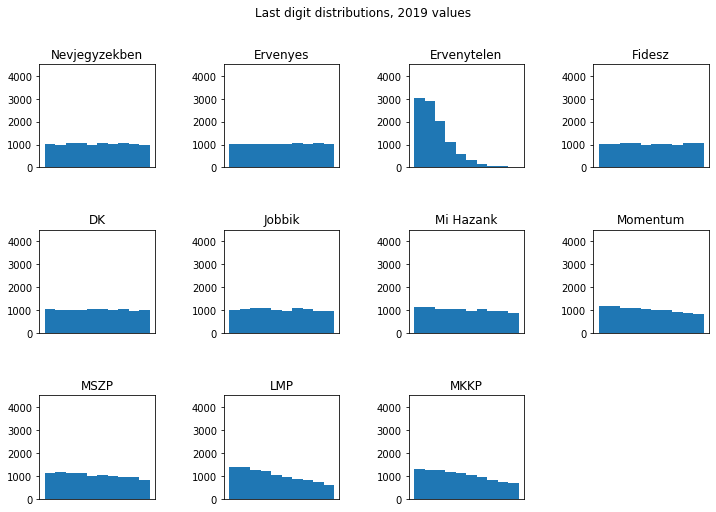

In [9]:
import HU.app10_distribution_of_digits as app10
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

app10.plot_digit_distributions()

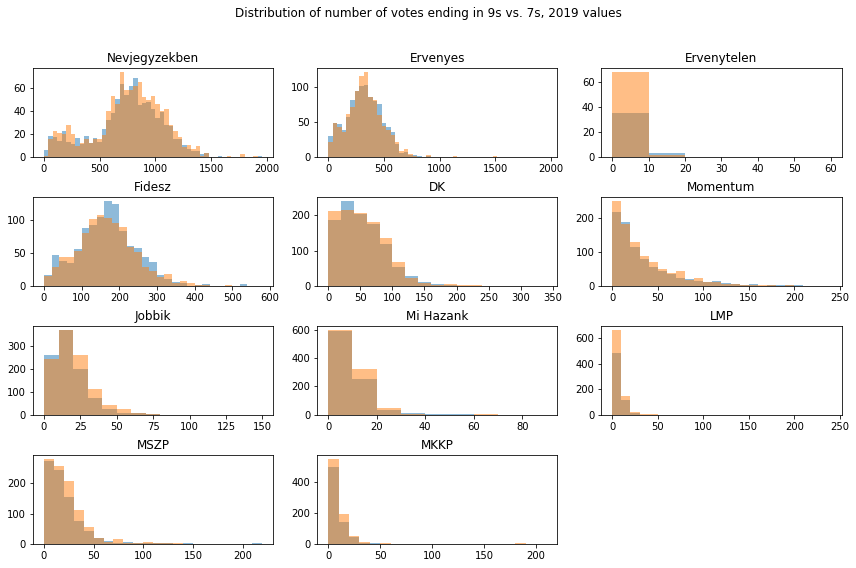

In [10]:
app10.plot_9_to_7_digit_distributions()

The first chart depicts similarly balanced distributions for 
* party votes of Fidesz, DK, Jobbik and Mi Hazank
* "Ervenyes", the valid votes

The second chart shows how often the various vote count ranges encountered digits of 9 (blue bars) and 7 (orange bars). Whilst 9 was often found to be overly preferred, 7 often seemed to be avoided, hence the choices.

Why is this interesting? Where the distribution is increasing while moving towards positive infinity horizontally, we could sensibly expect more numerous bigger digits to appear than smaller digits (on the charts, this would be taller orange bars than blue bars).

The digit frequency should in case of greater values follow something akin to a Zipf-distribution, making smaller numbers more frequent than larger ones. This is where two tendencies should be unlikely to cancel each other out, the right hand side - when on the decline, slightly more smaller digits should appear than bigger.

This consideration accords with most charts, except those of the Fidesz, and the "Ervenyes" (valid votes) chart.


These suggest that it should be worth looking into the numbers of primarily both of the top two parties, Fidesz and DK, as well as the valid vote count. Furthermore, given the flatness of the Jobbik party digits, perhaps ask the question - has some anomaly affected the Jobbik party votes, and has any 'consistency maintenance' been perhaps carried out on the valid vote counts, to leave fewer loose ends?

Another tendency to expect is that the digit distributions go hand in hand, should be unlikely to deviate away from each other much. This again seems fulfilled neatly, except perhaps for (again) the Fidesz and the valid votes charts.

#### Another (very rough) order of magnitude speculation

Having a second look at the Fidesz vote count by digit distribution chart may allow for taking one very rough guess about the potential magnitude of mishaps with the numbers.

Given that there are about 100 extra wards (vote counts ending in a 9) in excess of those ending in 7, unexpectedly, after the maximum of the chart, we can say something like 100 x 200 = 20,000 votes could be affected.

However, it quickly increases once we factor in that there are other digits to expect weird behaviour from.

What does the situation look like?

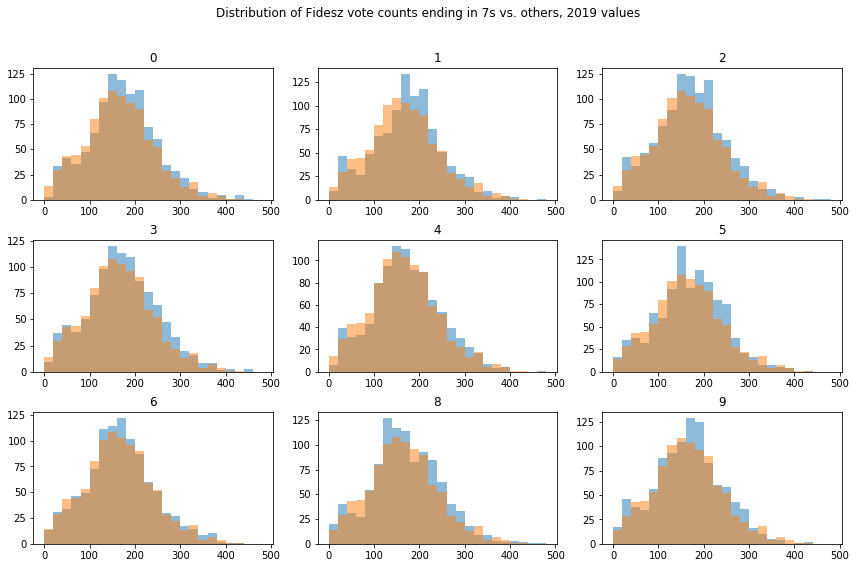

In [11]:
from HU.preprocessing import get_preprocessed_data
df = get_preprocessed_data()
app10.plot_party_vote_by_digit_relationships(df, "Fidesz", max_votes=500)

Assuming - very speculatively - that those 'outlying' bars at the top all represent some mishap, but in turn ignoring the right side of the 8/9 charts, we can "by the eye" estimate:

In [12]:
(20 * 4 + 20 * 3 + 15 * 4 +
10 * 3 + 10 + (30 + 10 + 5 + 20) +
20 + 25 + 25 * 2) * 175

70000

votes. Probably it is not 100% different from the true values, but what might be at stake is staggering, since although the total number of votes was recorded at 3.47M, this is about 3.8% of all the Fidesz votes, or of the same magnitude that some parties received in total (still requires further efforts to come up with a likely value, if possible), which is about the power to take away a mandate or give one. And again, it might be nothing, but can just as well be a tip of an often better camouflaged iceberg.

For comparison here are the results of the party receving the second largest number of votes, the DK.

Note that here
* the orange bars almost never "beat" the blue ones on the right hand side for the 8 and 9 digit plots
* there are no abrupt "outbreaks" such as in case of the Fidesz 8 and 9 charts around 120 and 180, respectively, let alone what happens in case of the 5s
* these charts are already magnified along the horizontal axis, and still appear to be much more regular

(The equivalent charts for the rest of the parties show up even more regular, for more details see/run the app10... python module.)

These charts look very promising, they could probably be turned into statistics and be an effective tool to assess situations at a glance, likely if plotted as 2 dimensional scatter plots as well (similarly to the vote turnout fingerprints in [[9]](#ref_9)).

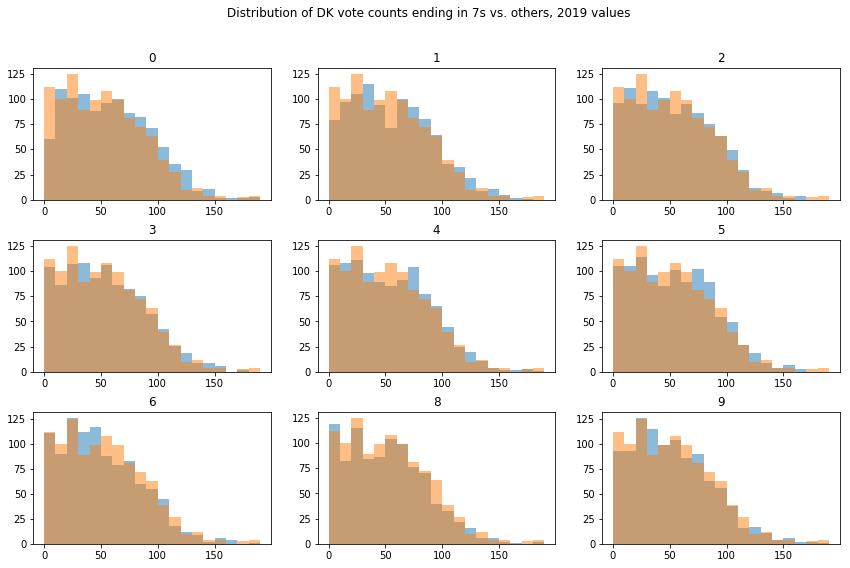

In [13]:
from HU.preprocessing import get_preprocessed_data

df = get_preprocessed_data()
app10.plot_party_vote_by_digit_relationships(df, "DK", max_votes=200)

<a id="methodology"></a>
### Methodology

The methodology is based on that for large enough vote counts, the last digit values can be considered close to i.i.d. uniformly distributed choices of the 10 possible digits in case of a fair, regular situation. A best effort towards this was made by restricting the examinations to the sufficiently sizeable electoral municipalities. The amount of deviation from expected usual statistical properties of this are considered to increase suspicion, but are not considered to be an evidence, only as a helpful vehicle for zooming onto likely more problematic areas. This then results in visible distortions in case of the top suspects, which then seems to confirm the correctness of the approach.

#### Entropy p-values

Originally some home made metric ($(n_{most frequent digit} - n_{least frequent digit}) / (n_{total  digits}$) was used to see how big the fluctuation in digit distributions is. However, while it was pointing towards largely the same geographic areas, and helped with the beginnings of the exploration, it can be fragile and non-standard, so a different, more mature/central one forms the basis of statistics.

The standard information entropy (python scipy.stats.entropy) formula is used [[6]](#ref_6):


$${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})}}$$

(where the $b=e$, i.e. $log_b$ is $ln$). This is probably much better-known and if in the need of improving the accuracy of the report e.g. in case of doubt, it should with a better potential allow for constructing more convincing arguments based on existing, mature mathematical results, rather than a home made metric.

Entropy can be understood as a measure that typically reduces when the numbers become more inhomogeneously distributed to the eye. Also, while it is "neutral" towards human preference for certain digits (e.g. 0 is both expected and often appeared to be an unreasonably frequent one), it already shows convincing signs of discrepancies.

It was for in this respect intentionally ignored that people have an attraction to certain digits (classic "lucky numbers"), as on the one hand cultural nuances may vary geographically within the country, on the other the analysis aims for 'good willed' estimates of discrepancy probabilities. The benefit of that is leaving some room for error: the results should be more likely to hold with this approach, perhaps in part, once correcting for human mistakes - should any come to light in the future.

#### Simulation

One relatively larger scale simulation was kept for the report at this stage (see the app5... module). It is rather slow and surely could be multithreaded/processed and otherwise accelerated (C, C++, ignoring unused values), but keeping it simple (at the cost of being slow) reduces the likeliness of errors creeping in and allows to reflect the thinking that lead to the algorithm. The concept here is to inject randomly generated last digits into the electoral ward vote numbers (for the Fidesz party only) and to examine what distribution of overall entropy (sum of individual entropies) they yield for the top x (ended up being 20) suspects, thereby becoming able to obtain a p-value for the actual data.

While creating this simulation did it become evident that entropy on its own is not an easily utilizable metric for comparing short sequences of varying length in terms of extracted source entropy. For instance, it would attach the same scores to the sequences [1, 2] and [1, 1, 2, 2], despite that the first is maximized and the second is unusually redundant given the draws in our case come from 10 elements.

The problems experienced while sorting have led to the construction of the entropy p-values, technically p-values of the possible entropy levels of a multinomial distribution depicting possible outcomes of n draws of 10 elements.

The items in the simulation were left ranked in ascending entropy order in the first case (app5). Utilizing the below p-values could almost surely improve on the quality of the findings here - see the app9... files, and the below paragraphs for more information.

#### Entropy and simulations

Whilst individual entropy p-values are interesting, and can reflect on where the problem, if any, may be concentrated, it is a good idea to confirm their overall significance given the bigger picture. Any rare event will happen occasionally if we are to sample long enough, and while there are apparently well more than one < 5% events, there are over 3100 municipalities involved - it is always a good idea to confirm, perhaps in this way, whether it is anything really unusual that seems to have been localized, or it is simply large numbers at play.

Entropy values were combined together to describe the overall likeliness via a likelihood function as well. This measure here is calculated as the logarithms of the individual municipality probabilities added up. A simulation (four times, with four different random seeds) is taking place to obtain a sample of these from uniform last digit distributions for municipalities that are sufficiently large. The distribution is then used as the basis of determining a p-value for the log likelihood value of the actual data.

#### Twin digits

This has been verified using Poisson distribution p-values. [[7]](#ref_7)
The associated probability value was the $P(repeats \ge actual repeats)$.

#### Overhearing

Overhearing is measured via the geometric mean of the probabilities of the number of coincident last digits among the $w_k$ wards of the $k$th municipality for select base and projected column pairs:

$$p_k = exp(\overline {ln(P(X_{w_k}=actual_{b, p}(k)) \text{ for } (b, p) \in (Base \times Projected \setminus \{ (Fidesz, Fidesz), (Ervenyes, Ervenyes) \} ))})$$

assuming a uniform distribution of the base column last digits. The base columns are the number of valid votes and the votes the Fidesz party has received. They are called base columns as they should be independent (orthogonal) of each other which likens them to (albeit not normalised) basis vectors. (In fact, they should be also orthogonal to the projected columns, which is the crux of the test.) The examination is narrowed down to the "feasibly large" municipalities (each number $\ge$100 and each municiplaity consisting of at least 8 wards).

The projected columns are the major party sequences (Fidesz, DK, Momentum, MSZP, LMP, Jobbik), the valid votes and the total number of registered voters (Ervenyes, Nevjegyzekben). This would lead to $2 (5 + 2) = 14$ pairs, but the Fidesz-Fidesz and Ervenyes-Ervenyes values are left out. On the other hand, both Fidesz-Ervenyes and Ervenyes-Fidesz are counted, i.e. this pair is in a sense doubly counted. (TODO: Might be something to improve on.)

An average of such probabilities is also calculated from the simulations, $\overline{p_k}$, one per each municipality (this does not tend to be constant), as the geometric mean of the probabilities obtained from repeated simulations of the data, in an identical way to the above for each simulation.

A relative probability is finally obtained as $\frac {p_k} {\overline {p_k}} $ which forms the basis of sorting aimed at finding the most interesting municipalities.

Remark: 2014 and 2018 data could be and were not examined in this way.

#### Fingerprint plots

The fingerprint plots are weighted versions of the election forensic fingerprints introduced in [8](#ref_8) (**TODO: verify**). 

The data points of $(turnout, vote share)$ are weighted by the vote counts, so these are vote distributions over the $(turnout, vote share)$ plane. This weighted histogram is then blurred using Gaussian kernel density estimation. The singular fingerprint plots display these in a normalized form.

The difference plots follow these steps applied to the constituent fingerprints first. Then these are scaled back from the noramlized form to be in the vote count dimension by a simple multiplication, within this, the difference of the corresponding histogram bins is calculated (first from second, above this is top suspect area vote distribution reduced by that of the less suspect areas). The resulting histograms are normalized together so that they remain comparable. Then the negative values are painted in blue, the positive (suspect) ones in red.

<a id="political_significance"></a>
### About the political significance of the results

The Hungarian elections have kept warranting the Fidesz party a "2/3" governing position. This supermajority has allowed the party to carry out modifications of very high importance without confirmation from the opposition, rendering them speaking puppets in the Parliament, both interesting and infuriating to watch.

However - interestingly, by coincidence - this has kept being a very fragile "2/3". Even the loss of a single parliamentary mandate would have broken this fragile "2/3" position (result of 49.27% of the votes in 2018 [[1]](ref_1)). Fidesz has barely hit the threshold in 2014 and 2018.

Could they have gained this effectively huge advantage by - perhaps repeat, "administrative mistakes"?

Furthermore, even the 2010 supermajority is hugely doubtful then.

Given the numbers from Wikipedia [[10]](#ref_10), the supermajority depended on largely 75,000 votes:


In [14]:
(263 / 386 - 2 / 3) * (2706292 + 990428 + 855436 + 383876 + 136895 + 45863 + 5606 + 4117 + 4018)

75348.03713298799

whilst even the above, albeit rough, fingerprint plots suggest a degree of influence of over 220,000 votes on the votes of the Fidesz party alone.

### Personal connection with the issue

The author has been confronted with the situation in Eger on multiple occasions for various bonds with the area. In certain wards, people feel like as if they have almost never seen an actual, living Fidesz voter (this does change when it comes to the vote counters). And yet, they are the majority. Isn't it strange?
Eger has come out (without particular intention) as a likely candidate for tampering on multiple occasions in the above, especially in 2019.

Thanks to Miklós Vázsonyi from Platon Party for inspiring to statistically check on the votes - even a quick look at Eger's results made it very difficult to miss a "poker" of numbers ending with 9's among the 2019 Fidesz votes in Eger ... so it seemed the quality of err... data processing has become worse (except if it has always been questionnable, but hopefully not).

The author also personally visited a certain ward in said municipality and his inquiry about the presence of opposition delegates was not 'too well received'.


### Conclusion and further steps

This analyis has/had multiple aims, some were realized as a potential side benefit along the way.

First, the author was curious whether there is actual evidence of tampering in the data - can anything significant be found? Apparently, yes.

The above shows some awkward digit distributions in each considered year.

Simulations confirm that the 2019 data is highly unlikely to be "regular", unaffected by biased digit choices.

Certain muncioalities/cities come up (e.g. Tata, Eger, Budapest V. kerület, Veresegyház, Érd, Pécel, Pomáz, Fót, Berettyóújfalu, Balatonfüred), even regularly, as very likely candidates for closer inspection, and this should not be missed.


#### Futher aims

Beyond the first aim, second, to draw attention of international bodies on the problem of, to say the least, election data processing in Hungary.
This time it was EP votes at stake, and the EU (for instance, the OSCE) should be watching, closely.
On the other hand, everyday people are allowed to inspect the voting process, and we should, too.

The 2019 elections are coming soon, and we should go prepared. The report should help motivating this.

Third, to suggest particular geographical areas which may deserve a closer attention next time there is an election.

Fourth, to demonstrate methods for further verification of past _Hungarian election data_.
In the above, there is room for simulation based checks on both the 2014 and 2018 data. This should be easy - little does the structure of the wards change, it is almost, if not exactly, the same problem as with the 2019 numbers (see app5...).
But there is also room for checking on the digits from multiple parties together, as it happened in case of the Fidesz and Jobbik in 2014 above, or for Balatonfüred in 2019.

Then, to demonstrate methods for further verification of past election data on an _international scale_.
Not only on grounds of suspicion about others' work - it would be very interesting to find out whether the above discrepancies are typical for some innocent reason rather than anything to be nosy about - i.e. to see if the above suffers from methodological or conceptual issues. (But also on grounds of suspicion :) )

Fifth, it could and should be hypothesized or possibly investigated whether in the suspect locations any party was likely to benefit from the discrepancies.

Sixth, there is a lot more data! There were not only general elections to refer to and compare against, even in the years 2014 and 2018. More data could lead to hopefully more convincing and more detailed findings. A baseline could and should also be formulated from data from other European countries, steps have been taken in this direction.

The author expects that a framework (such as a Python package, combined with a standardised format for voting data ) for such analyses could be very welcome by a broad range of experts and democrats - democracies will not work without ensuring that the processes are properly put in place, and this means repeat checks, even if this is a methodological chase between fraudsters and QA. The distributions above were examined mostly in a non-parametric style, reference distributions or functions to deal with the respective PMFs where missing should be a welcome part. 

The author hereby makes a commitment to improve on what the above provides in case of interest, and also wishes good luck to those digging deeper, irrespective of what their - hopefully correct! - aims and findings may be.

### Acknowledgements

For the data, thanks go to:

* Platón Party  (2018 and 2019) [[4]](#ref_4)
* András Kálmán (2014) [[5]](#ref_5)


### References

<a id="ref_1"></a>[1] [2018 Hungarian parliamentary election (Wikipedia)](https://en.wikipedia.org/wiki/2018_Hungarian_parliamentary_election)

<a id="ref_2"></a>[2] [2019 European Parliament election in Hungary (Wikipedia)](https://en.wikipedia.org/wiki/2019_European_Parliament_election_in_Hungary)

<a id="ref_3"></a>[3] [https://hu.wikipedia.org/wiki/2014-es_magyarorsz%C3%A1gi_%C3%B6nkorm%C3%A1nyzati_v%C3%A1laszt%C3%A1s](https://hu.wikipedia.org/wiki/2014-es_magyarorsz%C3%A1gi_%C3%B6nkorm%C3%A1nyzati_v%C3%A1laszt%C3%A1s)

<a id="ref_4"></a>[4] [https://www.facebook.com/platonpart/](https://www.facebook.com/platonpart/)

<a id="ref_5"></a>[5] [https://www.kaggle.com/akalman/hungarian-parliamentary-elections-results](https://www.kaggle.com/akalman/hungarian-parliamentary-elections-results)

<a id="ref_6"></a>[6] [https://en.wikipedia.org/wiki/Entropy_(information_theory)](https://en.wikipedia.org/wiki/Entropy_(information_theory))

<a id="ref_7"></a>[7] [https://en.wikipedia.org/wiki/Poisson_distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

<a id="ref_8"></a>[8] [What the Numbers Say: A Digit-Based Test for Election Fraud Using New Data from Nigeria](https://projects.iq.harvard.edu/gov2126/files/beber_scacco_electionfraud.pdf)

<a id="ref_9"></a>[9] [Statistical detection of systematic election irregularities](https://www.pnas.org/content/109/41/16469)

<a id="ref_10"></a>[10] [2010 Hungarian parliamentary election (Wikipedia)](https://en.wikipedia.org/wiki/2010_Hungarian_parliamentary_election)

# Appendix

## Overhearing and non-uniformity of last digits

### Insensitivity to non-uniformity of the 'projected' series

Consider two independent digit series, $c$ and $d$, termed as base and projected series.
If the distribution of $c$ is uniform ($p_{c_i} = 0.1; i = 0..9$), the distribution of $d$ ($p_{d_i}; i = 0..9$) does not affect the probability distribution of the number of coinciding digits, that is, of variable $X$ defined as number of $\left\{ c_i | c_i=d_i \right\}$, since the probability of an individual coincidence, $p$ in the binomial distribution PMF formula $P(X=k) = \binom {n} {k} p^k (1-p)^{n-k} $ will be left unchanged, effectively leaving the results unchanged.
This is so as the p value is calculable as $p=\sum{p_{c_i} p_{d_i}} = \sum 0.1 p_{d_i} = 0.1 \sum{p_{d_i}} = 1$ since exactly one of the $d_i$s is selected at any point.

Of course, this insensitivity - very beneficial to our above arguments - fades out as soon as both series lose uniformity.

Clearly, in accordance with the above charts, LMP, Jobbik, and other parties number of votes last digit distributions, also in accordance with the expectations against small, power-distributed value series, exhibit strong non-uniformity in their last digit distributions.

It is, however, the (base) series they are verified against which are near-uniform in this respect, as expanded on below.

### Reasonable generic uniformity of the valid votes and Fidesz last digits considered

The series with the two typically biggest values and entered in 2019 formed the basis of this verification. We could attempt a slightly fairer verification had we known what degree of non-uniformity to factor into our calculations. However, it was not possible to extract a statistically significant relationship between the digit and its probability for the involved municipalities (at least 8 wards, at least 100 minimum votes cast on Fidesz).

Thus, it is difficult to compensate for this effect which appears arguably significant.

The model diagnostics are as - with the p-value of the slope term exceeding 0.7 in both cases:


In [15]:
%load_ext rpy2.ipython
import HU.app14_digit_correlations_Hun as app14

ld_Fidesz_freqs, ld_Erv_freqs = app14.get_digit_freqs()

In [16]:
%%R -i ld_Fidesz_freqs,ld_Erv_freqs

x = 0:9
model1 = lm(ld_Fidesz_freqs ~ x)
print(summary(model1))

model2 = lm(ld_Erv_freqs ~ x)
print(summary(model2))



Call:
lm(formula = ld_Fidesz_freqs ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0093767 -0.0034644  0.0009529  0.0034343  0.0084213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1005252  0.0034253  29.348 1.97e-09 ***
x           -0.0001167  0.0006416  -0.182     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005828 on 8 degrees of freedom
Multiple R-squared:  0.004119,	Adjusted R-squared:  -0.1204 
F-statistic: 0.03309 on 1 and 8 DF,  p-value: 0.8602


Call:
lm(formula = ld_Erv_freqs ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008768 -0.003529 -0.001109  0.003732  0.009650 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1010991  0.0034549  29.262 2.01e-09 ***
x           -0.0002443  0.0006472  -0.377    0.716    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stand

However, it is an open question and could be very well raised how much the coincidence of skewed projected column distributions and skewed base column digit distributions (which is the case for certain vote count ranges) may affect the qualities of the test. This is not dealt with at this point, something to improve on.


### Has the choice of threshold affected the Fidesz votes last digit distribution?

A self test should also be carried out for peace of mind.
The below chart shows how much it matters if a random noise is added when deciding which municipalities are sufficiently large for hypothesizing a uniform distribution. If it starts at 100 (as it normally does) zero digits (assuming smallest values are the most frequent, which then becomes 100) might creep in.
The below charts show (both contain 10 replots each with a different random 10-wide boundary noise added) hardly any difference it makes whether this boundary is sharply placed at 100 or in a more blur, 95..105 way, without or with respecting the $ward count \ge 8$ constraint (the impact is the hardly visible vertical blur on the charts):

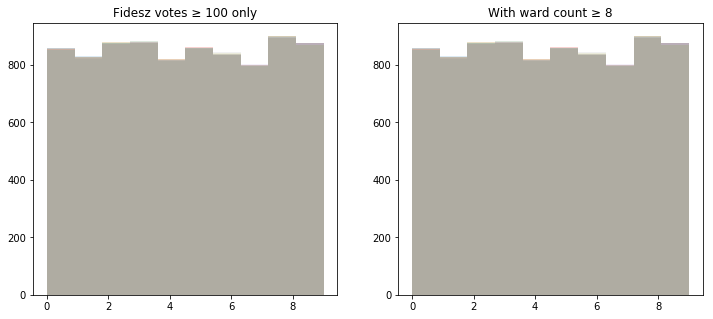

In [17]:
plt.rcParams['figure.figsize'] = [12, 5]
app10.plot_Fidesz_digits_sensitivity_to_cutoff()

### The author's personal opinion

My opinion - obviously, it is only my best bet - is that there is a systemic fraud in Hungarian elections, which other reports have already reflected on from perspectives typically different from the above, which is signified by the above, and which should cease to exist as soon as possible.
Not only are the electoral processes unfair, an unelected government is illegitimate, and particularly their policies reliant on the "2/3 majority" should be revoked, the people contributing to the fraud should be trialled.

This cries for a re-election, and perhaps even a repeat EP election in at least Hungary. The EU should not be forgiving in these matters.

And we, the people, should never accept the ruling of an illegitimate, fraudulent government. Such leaders should be deprived from their position  and held accountable whatever legitimate force it takes.

It is indeed a shocking possibility that the - at the time writing - governing party may have never had, likely never had the authorization from the people to carry out the modifications it did, such as the ridiculous move to remove "republic" from the official country name in 2012. Albeit some people never accepted it, we, all of us may have to realize that these are invalid, how grandiose the stakes are, and simply learn to ignore and even act against their will.

The EU on the other hand, should take steps towards ensuring a high standard of elections, it is not about liberal and illiberal - it is about legitimate and illegitimate. These ex-communist jackals do bite.